## GeoPandas
- Pandas + spatial operations on geometric types
- Pandas:
    - Probably the most useful data wrangling tool in the Python toolbox
    - Allows you to work with data frame structures in Python (as in the wonderful world of R)
    - Easy, expressive merging, joining, group-by operations, reshaping of heterogeneous typed columnar data
    - Geometry stored as Shapely geometry objects and spatial features read in using [fiona](http://toblerity.org/fiona/manual.html) (which in turn relies on [GDAL / OGR](http://www.gdal.org/))

### Import GeoPandas and explore
- Geopandas has a built in method to see datasets avaialable with GeoPandas
- We'll read in and plot example dataset that comes with GeoPandas to orient ourselves

In [1]:
import geopandas as gpd
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

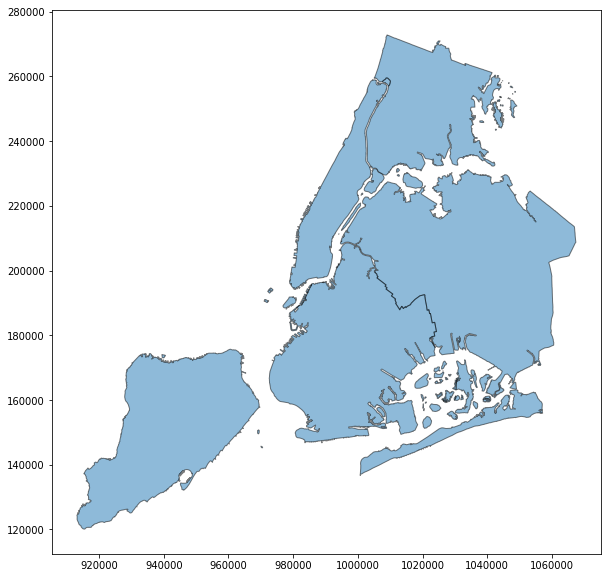

In [11]:
%matplotlib inline
df = gpd.read_file(gpd.datasets.get_path('nybb'))
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# I'm using matplotlib color code above - can also spell out, use hex strings as below:
#df.plot(figsize=(10, 10), alpha=0.5, edgecolor='black')
#df.plot(figsize=(10, 10), alpha=0.5, edgecolor='#33FF33',linewidth=3)

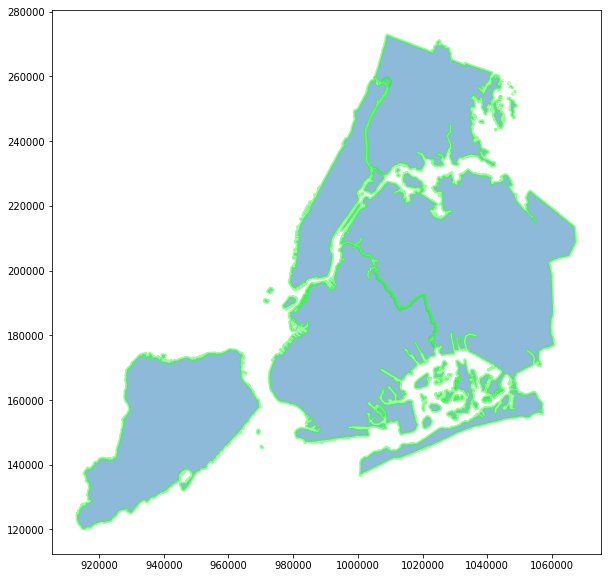

In [12]:
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='#33FF33',linewidth=3)

- GeoDataFrames are main object we work with in GeoPandas
- Look and act for the most part just like a Pandas DataFrame
- We can explore our GeoDataFrame the same as we would in Pandas

In [3]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [5]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
BoroCode      5 non-null int64
BoroName      5 non-null object
Shape_Leng    5 non-null float64
Shape_Area    5 non-null float64
geometry      5 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 280.0+ bytes


In [14]:
df.describe()

{'init': 'epsg:2263'}

In [7]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


GeoDataFrame is a tabular geospatial vector dataset
- Attribute columns that are exactly same as Pandas DataFrame
- A 'Geometry' column that holds the geometry in wkt format

In [8]:
type(df.BoroName)

pandas.core.series.Series

In [9]:
type(df.geometry)

geopandas.geoseries.GeoSeries

In [10]:
type(df.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

Let's stop and look at what shapely is all about...

- Shapely is it's own Python package
- Uses functions from GEOS (port of the Java Topology Suite (JTS))
- GEOS is the geometry engine for PostGIS
- Shapely allows PostGIS geometry operations outside a RDBMS
- Shapely adheres to Open Geospatial Consortium Simple Features specs
- Nicely Pythonic approaches to geometric operations on spatial data


In [17]:
df.geometry

0    (POLYGON ((970217.0223999023 145643.3322143555...
1    (POLYGON ((1029606.076599121 156073.8142089844...
2    (POLYGON ((1021176.479003906 151374.7969970703...
3    (POLYGON ((981219.0557861328 188655.3157958984...
4    (POLYGON ((1012821.805786133 229228.2645874023...
Name: geometry, dtype: object

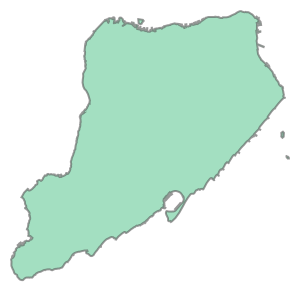

In [18]:
df.geometry[0]

In [21]:
df.BoroName[0]

'Staten Island'

- We indexed the first multipolygon record in the NY Boroughs data (Staten Island)
- We can drill into each polygon to see how data is stored within the GeoSeries in GeoPandas

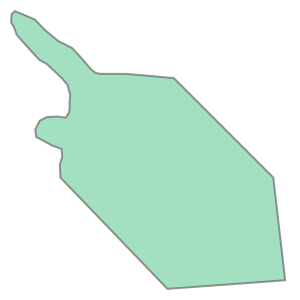

In [20]:
df.geometry[0][0]

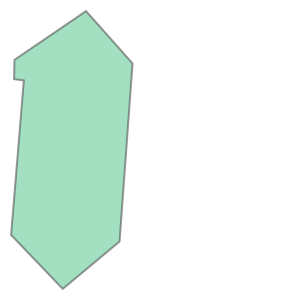

In [19]:
df.geometry[0][1]

In [4]:
from shapely.geometry import mapping
coords = mapping(df.geometry[0][0])
coords.keys()

dict_keys(['type', 'coordinates'])

In [29]:
coords

{'type': 'Polygon',
 'coordinates': (((970217.0223999023, 145643.33221435547),
   (970227.216003418, 145641.63360595703),
   (970273.9365844727, 145641.63360595703),
   (970323.2053833008, 145637.38598632812),
   (970362.7528076172, 145633.73638916016),
   (970547.9993896484, 145448.48999023438),
   (970570.1481933594, 145257.2030029297),
   (970350.6716308594, 145241.0946044922),
   (970151.3302001953, 145448.48999023438),
   (970150.3469848633, 145472.8823852539),
   (970154.6475830078, 145486.7398071289),
   (970153.6918334961, 145501.55200195312),
   (970134.9255981445, 145508.6401977539),
   (970115.466003418, 145519.23138427734),
   (970106.3872070312, 145524.01000976562),
   (970104.4761962891, 145538.3446044922),
   (970113.0767822266, 145554.5903930664),
   (970121.2760009766, 145558.6900024414),
   (970126.4559936523, 145561.28021240234),
   (970145.5687866211, 145562.23559570312),
   (970161.3370361328, 145560.32440185547),
   (970167.0709838867, 145568.92541503906),
   (970

In [24]:
coords['coordinates']

(((970217.0223999023, 145643.33221435547),
  (970227.216003418, 145641.63360595703),
  (970273.9365844727, 145641.63360595703),
  (970323.2053833008, 145637.38598632812),
  (970362.7528076172, 145633.73638916016),
  (970547.9993896484, 145448.48999023438),
  (970570.1481933594, 145257.2030029297),
  (970350.6716308594, 145241.0946044922),
  (970151.3302001953, 145448.48999023438),
  (970150.3469848633, 145472.8823852539),
  (970154.6475830078, 145486.7398071289),
  (970153.6918334961, 145501.55200195312),
  (970134.9255981445, 145508.6401977539),
  (970115.466003418, 145519.23138427734),
  (970106.3872070312, 145524.01000976562),
  (970104.4761962891, 145538.3446044922),
  (970113.0767822266, 145554.5903930664),
  (970121.2760009766, 145558.6900024414),
  (970126.4559936523, 145561.28021240234),
  (970145.5687866211, 145562.23559570312),
  (970161.3370361328, 145560.32440185547),
  (970167.0709838867, 145568.92541503906),
  (970168.5043945312, 145576.09259033203),
  (970168.5043945312,

### Workflows with GeoPandas
- We'll grab some publicly available data for city of Portland as geojson files
- Explore some simple analyses with data using GeoPandas

In [5]:
url = "https://opendata.arcgis.com/datasets/c525d5f666074c42aa4131fb9fcdf7f3_27.geojson"
trails = gpd.read_file(url)

In [40]:
trails.head()

,OBJECTID,PROPERTYID,Local_Name,TYPE,STATUS,Manager,SURFACE,WIDTH_FT,SOURCE,Regional_trail,...,Springwater,Willamette_Greenway,Notes,Red_Electric,Hillsdale_Lake_Oswego,Fanno_Creek_Greenway,MILES,Shape_Length,Fire_access,geometry
0,1,NaN,St. Helens Road,on-street trail,existing,,bike lane,0.0,40milooprev_dgn,,...,,Willamette Greenway (interim),,,,,0.089773,206.678852,None,LINESTRING (-122.7849640049369 45.597741849139...
1,2,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,PP&R - CN,concrete,10.0,200702SL,regional trail,...,Springwater Corridor,,,,,,0.036589,83.855356,None,LINESTRING (-122.6368735799581 45.460978229348...
2,3,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,Gresham,asphalt,10.0,200703SL,regional trail,...,Springwater Corridor,,,,,,0.086325,198.061099,None,LINESTRING (-122.4308682233347 45.495186770245...
3,4,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,PP&R - CN,concrete,0.0,40milooprev_dgn,regional trail,...,Springwater Corridor,,,,,,0.048157,110.366973,None,LINESTRING (-122.6397373533883 45.460184288015...
4,5,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,Gresham,asphalt,10.0,200703SL,regional trail,...,Springwater Corridor,,,,,,0.207378,476.172890,None,LINESTRING (-122.4210221703912 45.486589213518...


- Going back to plotting, it's easy to add backgrounds as well with other libraries
- We'll need to convert to web mercator to use background tiles

In [6]:
trails = trails.to_crs(epsg=3857)

Side note on coordinate reference systems (CRS) in GeoPandas...
- crs is a property of GeoDataFrames (i.e. df.crs) 
- you define a projection like: df.crs = {'init': 'epsg:4326'}
- once a CRS is defined, you re-project to different CRS like: df = df.to_crs({'init': 'epsg:3395'})
- www.spatialreference.org is your friend!

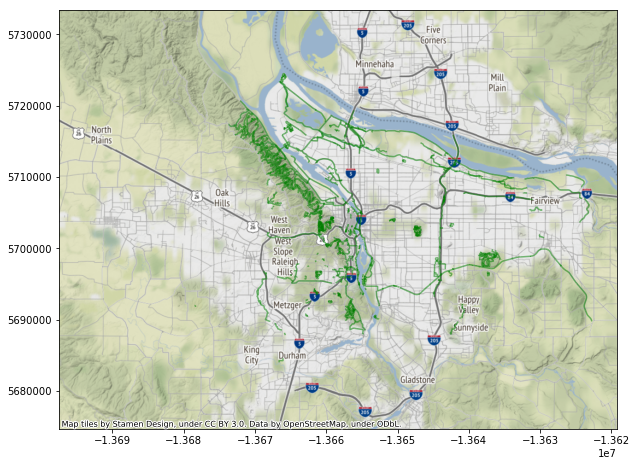

In [7]:
import contextily as ctx
import matplotlib.pyplot as plt
ax = trails.plot(figsize=(10, 10), alpha=0.5, edgecolor='g')
ctx.add_basemap(ax, zoom=11)
plt.show()

### Filtering in GeoPandas
- Find categories of a variable
- Create boolean index and subset records

In [37]:
print (trails['SURFACE'].unique())

['bike lane' 'concrete' 'asphalt' 'chipseal' 'water' 'soil' 'gravel'
 'bike / ped / vehicle share' 'sidewalk' 'road shoulder' 'bark ADA'
 'gravel (3/4" run)' 'asphalt (porous)' 'bike lane / sidewalk'
 'gravel (1/4" minus)' 'bark' 'metal' 'wood (untreated)' 'chips'
 'wood (treated)' 'stone' None]


In [38]:
dirt_trails = df[df['SURFACE']=='soil']

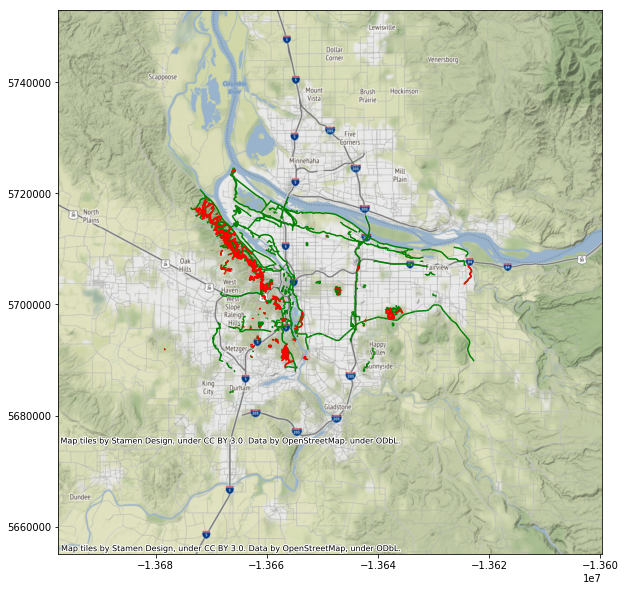

In [63]:
fig,ax = plt.subplots(figsize=(10,10))
ctx.add_basemap(trails.plot(ax=ax, color = 'green'), zoom=11)
ctx.add_basemap(dirt_trails.plot(ax=ax, color = 'red'), zoom=11)
plt.show()

### Grouping
- The power of Pandas with spatial data

In [58]:
trails.groupby(['Manager'])['MILES'].sum()

Manager
                                   0.124575
                                 122.199520
BES                                1.725596
Gresham                            7.609191
MCDD                               0.181731
Metro                              1.203559
North Clackamas Parks and Rec      0.235665
ODOT                              24.412219
OPRD                              13.666983
PBOT                               0.544896
PDOT                               4.743482
PDOT (adjacent landowners?)        2.420118
PP&R                              46.326938
PP&R - CN                        149.882184
Port of Portland                   2.022673
Portland Audubon                   1.651270
THPRD                              7.623373
Water bureau                       0.414734
existing owner                     1.307943
Name: MILES, dtype: float64

### Spatial Operations
- Bring in another Portland maps data layer and perform some typical spatial operations

In [69]:
url = "https://opendata.arcgis.com/datasets/9f50a605cf4945259b983fa35c993fe9_125.geojson"
neighborhoods = gp.read_file(url)


HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
http://tile.stamen.com/terrain/12/581/1801.png

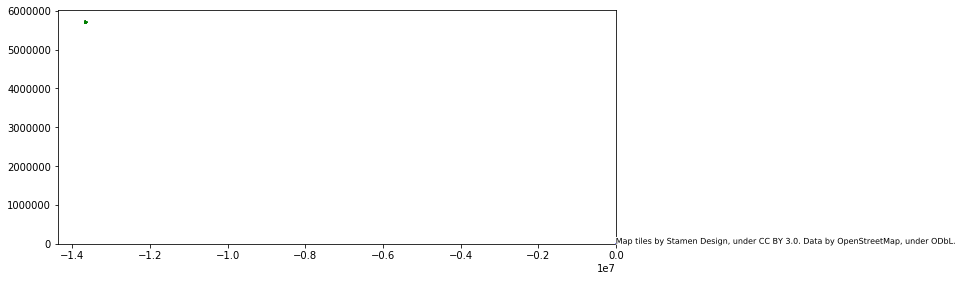

In [70]:
fig,ax = plt.subplots(figsize=(10,10))
ctx.add_basemap(neighborhoods.plot(ax=ax, color = 'none', edgecolor='blue'), zoom=12)
ctx.add_basemap(trails.plot(ax=ax, color = 'green'), zoom=12)
plt.show()

Coordinate reference systems are crucial using GeoPandas!

In [71]:
neighborhoods = neighborhoods.to_crs(trails.crs)

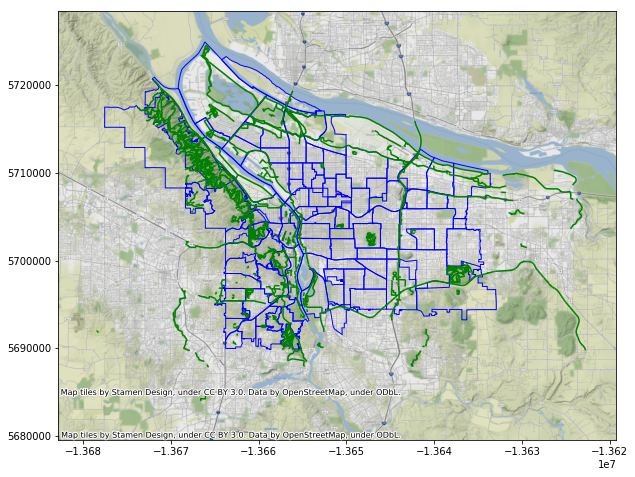

In [73]:
fig,ax = plt.subplots(figsize=(10,10))
ctx.add_basemap(neighborhoods.plot(ax=ax, color = 'none', edgecolor='blue'), zoom=13)
ctx.add_basemap(trails.plot(ax=ax, color = 'green'), zoom=13)
plt.show()

### Spatial join and summarise
- What is the total length of trails in each Portland neighborhood?
- Remember, coordinate reference systems crucial!
- For spatial overlay, it's best we're in a planar CRS
- I looked up the EPSG code for UTM10N [here](http://spatialreference.org/ref/epsg/nad83-utm-zone-10n/)

In [94]:
trails = trails.to_crs(epsg=26910)
neighborhoods = neighborhoods.to_crs(epsg=26910)
# drop columns
neighborhoods = neighborhoods.drop(['OBJECTID','COMMPLAN','COALIT','SHARED','HORZ_VERT','MAPLABEL',
#                                    'Shape_Length','Shape_Area'], axis=1)
trails = trails[['MILES','geometry']]


In [106]:
neighborhoods_and_trails = gp.sjoin(neighborhoods, trails, how="inner", op='contains')
neighborhoods_and_trails.head()


,NAME,ID,geometry,index_right,MILES
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",1249,0.237642
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",1391,0.386299
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",543,0.018165
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",542,0.009599
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",540,0.017255


In [111]:
grouped = neighborhoods_and_trails.groupby(['NAME'])['MILES'].sum().reset_index()
grouped.sort_values('MILES', ascending=False).head()

,NAME,MILES
17,FOREST PARK,76.749665
29,LINNTON,64.055723
2,ARLINGTON HEIGHTS,17.257251
49,PLEASANT VALLEY,15.134122
58,ST. JOHNS,14.830995


## Rasterio
- Uses GDAL's data model but with Pythonic features and idioms
- Registers all known GDAL drivers for reading raster formats

### Import Rasterio and explore
- We'll read PRISM raster downloaded and stored on disk 
- Explore raster properties using PRISM and see how to combine with vector data for zonal statistics

In [2]:
import rasterio as rio
import os
import numpy as np

prism_april_30yrnorm = 'PRISM_tmean_30yr_normal_4kmM2_04_bil/PRISM_tmean_30yr_normal_4kmM2_04_bil.bil'
# Open file
raster = rio.open(prism_april_30yrnorm)

Explore the structure of raster as read in by Rasterio

In [4]:
# Check type of the variable 'raster'
type(raster)

rasterio.io.DatasetReader

- The raster variable is a 'DatasetReader' type
- This means we've opened the file for reading
- Several methods for extracting infomration about the raster

In [7]:
# Projection
raster.crs

CRS.from_dict(init='epsg:4269')

In [8]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform

Affine(0.041666666667, 0.0, -125.0208333333335,
       0.0, -0.041666666667, 49.9375000000025)

In [19]:
# Dimensions
print('raster is ' + str(raster.width) + ' cells wide and is ' + str(raster.height) + ' cells tall')

raster is 1405 cells wide and is 621 cells tall


In [20]:
# All Metadata 
raster.meta

{'driver': 'EHdr',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 1405,
 'height': 621,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:4269'),
 'transform': Affine(0.041666666667, 0.0, -125.0208333333335,
        0.0, -0.041666666667, 49.9375000000025)}

In [9]:
# Read in all bands (this raster only has one) into numpy array
array =raster.read(1, masked=True) # we use the NoData value of -9999.0 as a mask on read-in
# Check type of the variable 'array'
print(type(array))
array

<class 'numpy.ma.core.MaskedArray'>


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

In [11]:
# Quick stats - note I'm getting statistics from array and converting C to F
print('mean 30 year norm temp for April is ' + str(round((array.mean() * 9/5) + 32)))
print('min 30 year norm temp for April is ' + str(round((array.min() * 9/5) + 32)))
print('max 30 year norm temp for April is ' + str(round((array.max() * 9/5) + 32)))
print('median 30 year norm temp for April is ' + str(round((np.median(array) * 9/5) + 32)))

mean 30 year norm temp for April is 51.0
min 30 year norm temp for April is 17.0
max 30 year norm temp for April is 77.0
median 30 year norm temp for April is 40.0


Text(0.5, 1.0, 'PRISM 30-Year Normal April Temp (C)')

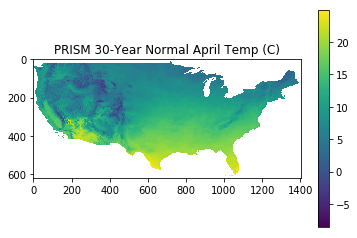

In [20]:
# Quick visualizing of the PRISM data
plt.imshow(array)
plt.colorbar()
plt.title('PRISM 30-Year Normal April Temp (C)')

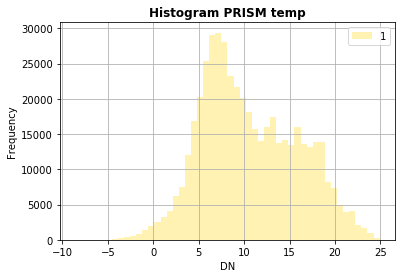

In [22]:
# Histogram
from rasterio.plot import show_hist

show_hist(array, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram PRISM temp")

### Clipping and Zonal Statistics
- Bring in GeoDataFrame of some watersheds
- Clip CONUS raster to GeoDataFrame
- Calculate zonal statistics for watersheds

We'll grab EPA NRSA 08-09 Watersheds from EPA National Aquatic Resource Surveys webpage

In [19]:
import requests, zipfile, io
zip_file_url = 'https://www.epa.gov/sites/production/files/2017-11/nrsa0809_watersheds.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [5]:
wshds = gpd.read_file('NRSA0809_Watersheds.shp')
wshds.head()


,SITE_ID,SITE_ID2,DATA_1,DATA_2,NOTES,Shape_Leng,Shape_Area,cbnfMN,cbnfMIN,cbnfMAX,cbnfSTD,cbnfCNT,cbnfSUM,cbnfMED,cbnfQLOW,cbnfQUPP,Area_SqKM,geometry
0,FW08RUT99066,5302463,MANTI_CANYON,NRSAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,36096.982930,4.665932e+07,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,46.659316,"POLYGON ((-1316129.5329 1915154.6479, -1315872..."
1,FW0805451900,17541945,RICHLAND_CREEK/RICHARD_CREEK,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,77948.288346,1.421056e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,142.105633,"(POLYGON ((269835.0009999983 2106464.9981, 269..."
2,FW0805458000,7016407,LITTLE_CEDAR_RIVER,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,220925.736120,7.723956e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,772.395602,"(POLYGON ((282944.9979000017 2238735.0019, 282..."
3,FW0805470500,6978994,SQUAW_CREEK,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,150840.978288,5.385289e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,538.528947,"POLYGON ((180833.6728000008 2149168.9475, 1811..."
4,FW0806177500,12526443,REDWATER_RIVER,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,204217.393604,1.425196e+09,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1425.196129,"POLYGON ((-748618.1258000005 2755201.9364, -74..."


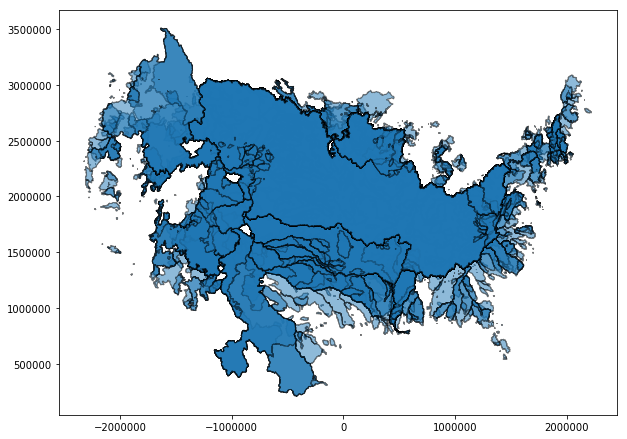

In [16]:
%matplotlib inline
wshds.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [6]:
# raster and GeoDataFrame must be same CRS:
print(wshds.crs)
print(raster.crs)
wshds = wshds.to_crs({'init': 'epsg:4269'})

{'init': 'epsg:5070'}
+init=epsg:4269


In [31]:
from rasterstats import zonal_stats
# Calculate zonal statistics of PRISM data for NRSA watersheds
# we're using raster.transform we showed earlier for our PRISM raster
zs_wshds = zonal_stats(wshds, array, affine=raster.transform, nodata=-9999.0,stats=['min', 'max', 'mean', 'median'],geojson_out=True)

In [17]:
print(type(zs_wshds)), print(len(zs_wshds))
print(type(zs_wshds[0]))

<class 'list'>
2172
<class 'dict'>


In [32]:
# zonal state geojson output back to GeoDataFrame
zs_wshds = gpd.GeoDataFrame.from_features(zs_wshds)
list(zs_wshds)

['Area_SqKM',
 'DATA_1',
 'DATA_2',
 'NOTES',
 'SITE_ID',
 'SITE_ID2',
 'Shape_Area',
 'Shape_Leng',
 'cbnfCNT',
 'cbnfMAX',
 'cbnfMED',
 'cbnfMIN',
 'cbnfMN',
 'cbnfQLOW',
 'cbnfQUPP',
 'cbnfSTD',
 'cbnfSUM',
 'geometry',
 'max',
 'mean',
 'median',
 'min']

Broadcast a function in Pandas to convert our mean temp C column to F and display our results

In [48]:
def temp_convert(x):
    return (x * 9/5) + 32
# zs_wshds[:= (zs_wshds['max'][max][median][min] * 9/5) + 32
#zs_wshds[['max']][['mean']][['median']][['min']].apply(temp_convert)
x = 5
zs_wshds[['max','mean','median','min']] = zs_wshds[['max','mean','median','min']].apply(temp_convert)

In [49]:
zs_wshds.iloc[0:10, [4,18,19,20,21]] 

,SITE_ID,max,mean,median,min
0,FW08RUT99066,34.691000,32.855000,32.855000,31.019000
1,FW0805451900,49.325000,49.057000,49.045999,48.838999
2,FW0805458000,47.516000,46.410980,46.426999,45.122000
3,FW0805470500,49.351999,49.123727,49.189999,48.650000
4,FW0806177500,44.420000,43.658340,43.781000,41.936000
5,FW0806183450,42.836000,42.378742,42.449001,41.621000
6,FW0806244500,42.692000,39.647677,40.433000,31.946000
7,FW0806309200,34.646000,33.626000,33.476000,32.675000
8,FW0806444000,45.860001,43.911500,43.785500,42.521000
9,FW0806447500,45.878000,45.275367,45.248000,44.492000


## Resources
- [GeoPandas Docs](http://geopandas.org/index.html)
- [Joris Van den Bossche geopandas-tutorial](https://github.com/jorisvandenbossche/geopandas-tutorial/blob/master/01-introduction-geospatial-data.ipynb)
- [Intro to Python GIS](https://automating-gis-processes.github.io/CSC/index.html)
- [The Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#)
- [GeoPandas Introduction](https://geohackweek.github.io/vector/04-geopandas-intro/)
- [Rasterio Docs](https://rasterio.readthedocs.io/en/stable/)
- [Raster processing using Python Tools](https://geohackweek.github.io/raster/)
- [Chris Albion website](https://chrisalbon.com/#python)
    - General Pyrhon / Data Science but incredibly useful!
- [GeoPandas Advanced Topics](https://geohackweek.github.io/vector/06-geopandas-advanced/)
- [Crop Raster With Shapefile in Python (UC EarthLab)](https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/crop-raster-data-with-shapefile-in-python/)
- [Mapping in Python with GeoPandas](http://darribas.org/gds15/content/labs/lab_03.html)

